In [2]:
%load_ext autoreload
%autoreload 2

In [42]:
import numpy as np
from metrics.BERTScoreEval import BERTScoreEval
from metrics.RankEval import RankEval
from metrics.BiDirectionalEntailmentEval import BiDirectionalEntailmentEval
from utils.parse_csv import Parser
from utils.bootstrap import bootstrap

In [12]:
parser = Parser()
berteval = BERTScoreEval()

Initalizing BERTScore Evaluator...


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERTScore Evaluator Initialized to cpu


# Get Bootstrap for gpt-3.5-turbo free anonymous

In [13]:
f_path = '/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt3.5turbo-free-False-20-1.0/run1.csv'
m1, m2 = parser.parse_free(f_path)

In [14]:
m1_all = berteval.get_berts_within(m1, verbose=True)
m2_all = berteval.get_berts_within(m2, verbose=True)

Creating Pairs...: 20it [00:00, 153637.51it/s]


Getting BERTScores:   0%|          | 0/190 [00:00<?, ?it/s]

Creating Pairs...: 20it [00:00, 350987.78it/s]


Getting BERTScores:   0%|          | 0/190 [00:00<?, ?it/s]

In [15]:
m1_all = np.array(m1_all)
m2_all = np.array(m2_all)

In [16]:
np.save('move1.npy', m1_all)
np.save('move2.npy', m2_all)

In [22]:
# boostrap

In [27]:
sampled_means_m1 = bootstrap(m1_all)
sampled_means_m2 = bootstrap(m2_all)

In [30]:
np.savez('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/run1_allpairs/gpt3.5turbo-free-False-20-1.0/means.npz', move1=sampled_means_m1, move2=sampled_means_m2)

In [36]:
def do_all_bert(f_path, save_path):
    m1, m2 = parser.parse_free(f_path)

    m1_all = np.array(berteval.get_berts_within(m1))
    m2_all = np.array(berteval.get_berts_within(m2))

    np.save(f'{save_path}/move1.npy', m1_all)
    np.save(f'{save_path}/move2.npy', m2_all)

    # bootstrap
    means_m1 = bootstrap(m1_all)
    means_m2 = bootstrap(m2_all)
    np.savez(f'{save_path}/means.npz', move1=means_m1, move_2=means_m2)
    
    

In [37]:
go_through = [
    ('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt3.5turbo-free-True-20-1.0/run1.csv',
     '/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/run1_allpairs/gpt3.5turbo-free-True-20-1.0'),
    
    ('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4-free-False-20-1.0/run1.csv',
     '/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/run1_allpairs/gpt4-free-False-20-1.0'),
    
    ('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4-free-True-20-1.0/run1.csv',
     '/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/run1_allpairs/gpt4-free-True-20-1.0'),
    
    ('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/claude35sonnet-free-False-20-1.0/run1.csv',
     '/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/run1_allpairs/claude35sonnet-free-False-20-1.0'),

    ('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/claude35sonnet-free-True-20-1.0/run1.csv',
     '/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/run1_allpairs/claude35sonnet-free-True-20-1.0')
]

In [39]:
for f, save in go_through:
    do_all_bert(f, save)

In [46]:
rankeval = RankEval()

In [50]:
def do_all_kendall(f_path, save_path):
    m1, m2 = parser.parse_rankings(f_path)

    m1_all = np.array(rankeval.get_metric_within(m1))
    m2_all = np.array(rankeval.get_metric_within(m2))

    np.save(f'{save_path}/kendallmove1.npy', m1_all)
    np.save(f'{save_path}/kendallmove2.npy', m2_all)

    # bootstrap
    means_m1 = bootstrap(m1_all)
    means_m2 = bootstrap(m2_all)
    np.savez(f'{save_path}/kendallmeans.npz', move1=means_m1, move_2=means_m2)
    

In [54]:
go_through = [
    ('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt3.5turbo-rank-False-20-1.0/run1.csv',
     '/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/run1_allpairs/gpt3.5turbo-rank-False-20-1.0'),
    
    ('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt3.5turbo-rank-True-20-1.0/run1.csv',
     '/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/run1_allpairs/gpt3.5turbo-rank-True-20-1.0'),
    
    ('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4-rank-False-20-1.0/run1.csv',
     '/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/run1_allpairs/gpt4-rank-False-20-1.0'),
    
    ('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4-rank-True-20-1.0/run1.csv',
     '/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/run1_allpairs/gpt4-rank-True-20-1.0'),
    
    ('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/claude35sonnet-rank-False-20-1.0/run1.csv',
     '/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/run1_allpairs/claude35sonnet-rank-False-20-1.0'),

    ('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/claude35sonnet-rank-True-20-1.0/run1.csv',
     '/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/run1_allpairs/claude35sonnet-rank-True-20-1.0')
]

In [55]:
for f, save in go_through:
    do_all_kendall(f, save)

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
sns.set_style("darkgrid")
sns.set_palette('husl')

In [92]:
data = np.load('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/run1_allpairs/gpt4-rank-True-20-1.0/kendallmeans.npz')

Text(0.5, 1.0, 'Bootstrapped: GPT-4, Rank, Explicit, Kendall')

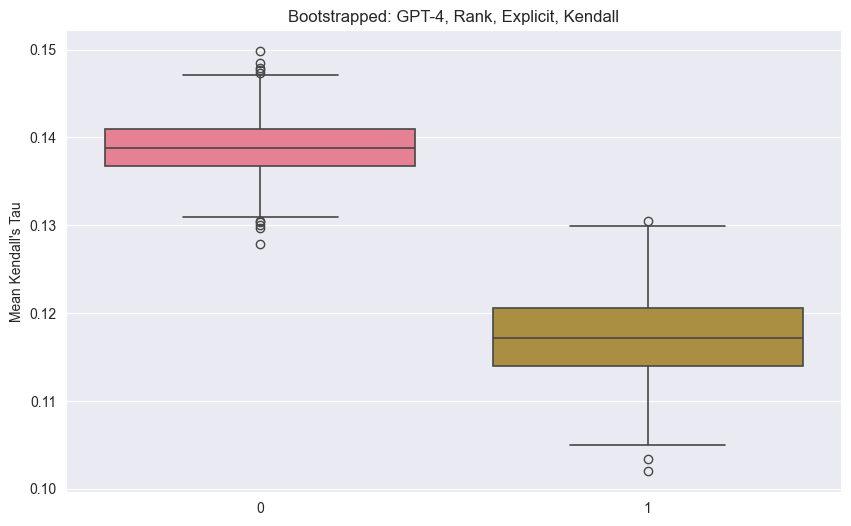

In [93]:
plt.figure(figsize=(10, 6))
sns.boxplot([data['move1'], data['move_2']], linewidth=1.2)
plt.ylabel('Mean Kendall\'s Tau')
plt.title('Bootstrapped: GPT-4, Rank, Explicit, Kendall')

In [95]:
data = np.load('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/run1_allpairs/gpt4-rank-False-20-1.0/kendallmeans.npz')

Text(0.5, 1.0, 'Bootstrapped: GPT-4, Rank, Anon, Kendall')

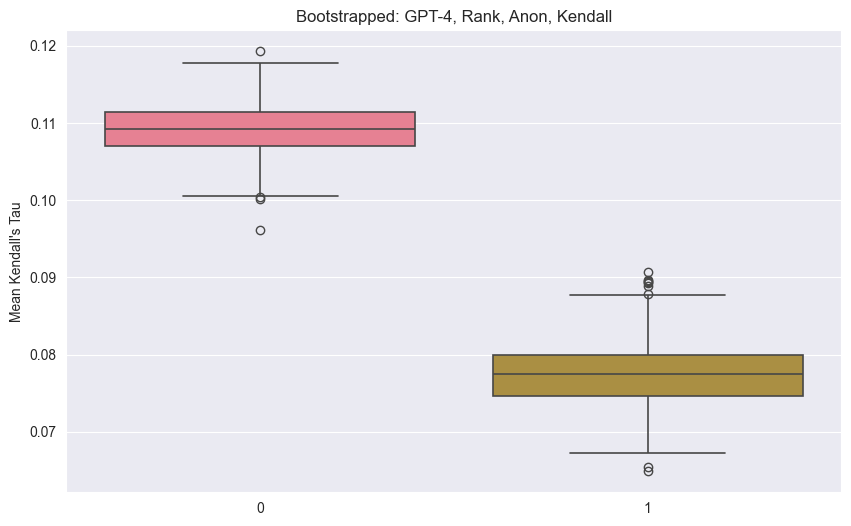

In [96]:
plt.figure(figsize=(10, 6))
sns.boxplot([data['move1'], data['move_2']], linewidth=1.2)
plt.ylabel('Mean Kendall\'s Tau')
plt.title('Bootstrapped: GPT-4, Rank, Anon, Kendall')

In [97]:
data = np.load('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/run1_allpairs/gpt3.5turbo-rank-True-20-1.0/kendallmeans.npz')

Text(0.5, 1.0, 'Bootstrapped: GPT-3.5-Turbo, Rank, Explicit, Kendall')

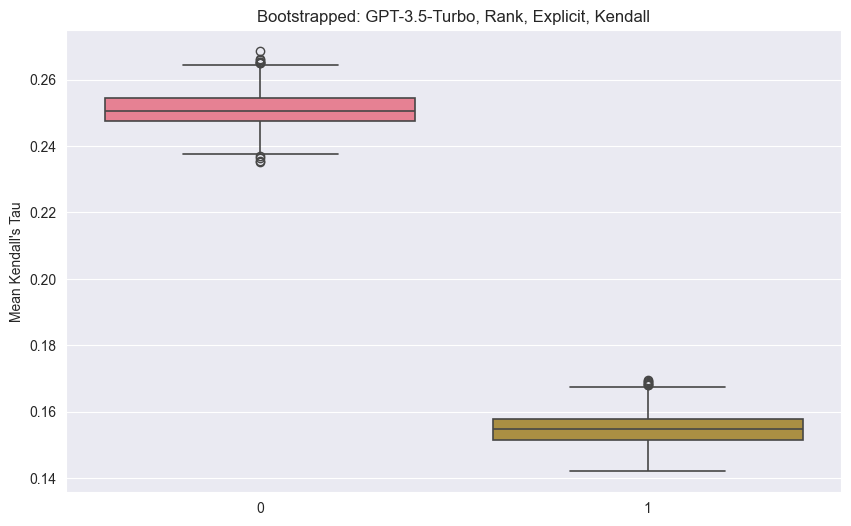

In [98]:
plt.figure(figsize=(10, 6))
sns.boxplot([data['move1'], data['move_2']], linewidth=1.2)
plt.ylabel('Mean Kendall\'s Tau')
plt.title('Bootstrapped: GPT-3.5-Turbo, Rank, Explicit, Kendall')

In [103]:
data = np.load('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/run1_allpairs/gpt3.5turbo-rank-False-20-1.0/kendallmeans.npz')

Text(0.5, 1.0, 'Bootstrapped: GPT-3.5-Turbo, Rank, Anon, Kendall')

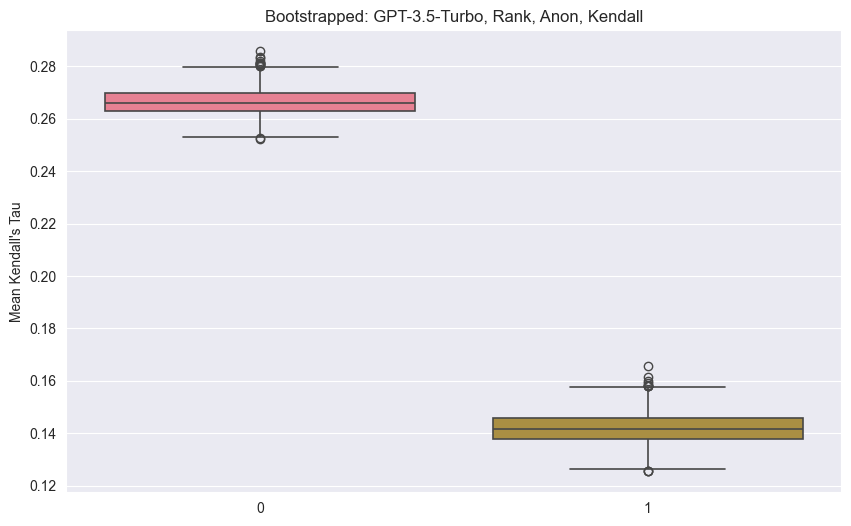

In [104]:
plt.figure(figsize=(10, 6))
sns.boxplot([data['move1'], data['move_2']], linewidth=1.2)
plt.ylabel('Mean Kendall\'s Tau')
plt.title('Bootstrapped: GPT-3.5-Turbo, Rank, Anon, Kendall')

In [105]:
data = np.load('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/run1_allpairs/claude35sonnet-rank-True-20-1.0/kendallmeans.npz')

Text(0.5, 1.0, 'Bootstrapped: Claude-3.5-Sonnet, Rank, Explicit, Kendall')

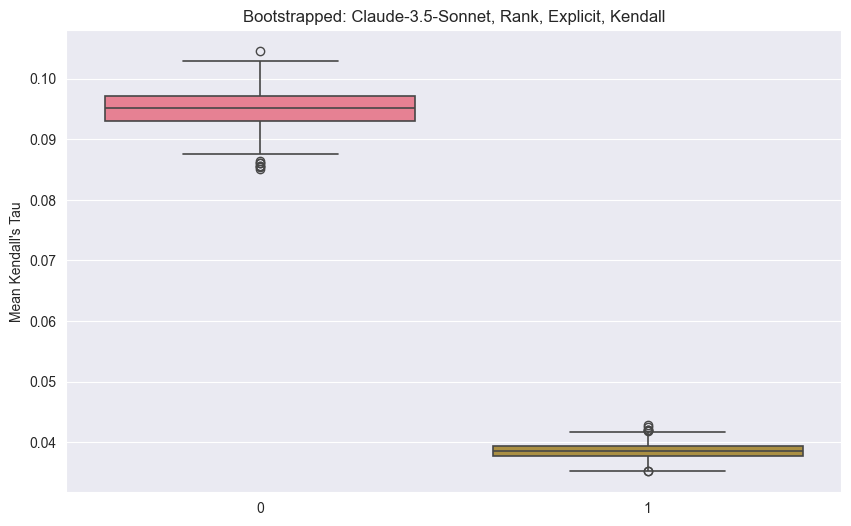

In [106]:
plt.figure(figsize=(10, 6))
sns.boxplot([data['move1'], data['move_2']], linewidth=1.2)
plt.ylabel('Mean Kendall\'s Tau')
plt.title('Bootstrapped: Claude-3.5-Sonnet, Rank, Explicit, Kendall')

In [107]:
data = np.load('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/run1_allpairs/claude35sonnet-rank-False-20-1.0/kendallmeans.npz')

Text(0.5, 1.0, 'Bootstrapped: Claude-3.5-Sonnet, Rank, Anon, Kendall')

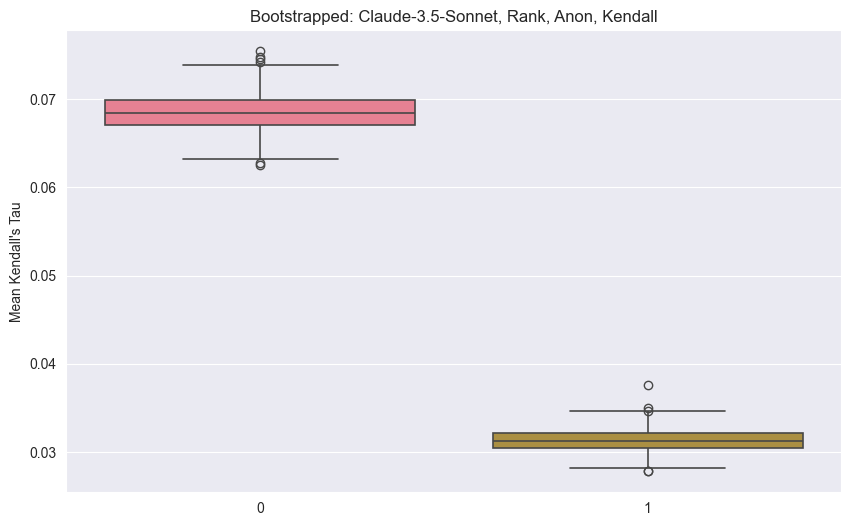

In [108]:
plt.figure(figsize=(10, 6))
sns.boxplot([data['move1'], data['move_2']], linewidth=1.2)
plt.ylabel('Mean Kendall\'s Tau')
plt.title('Bootstrapped: Claude-3.5-Sonnet, Rank, Anon, Kendall')

In [109]:
data1 = np.load('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/run1_allpairs/gpt3.5turbo-rank-True-20-1.0/kendallmeans.npz')
data2 = np.load('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/run1_allpairs/gpt3.5turbo-rank-False-20-1.0/kendallmeans.npz')
data3 = np.load('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/run1_allpairs/gpt4-rank-True-20-1.0/kendallmeans.npz')
data4 = np.load('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/run1_allpairs/gpt4-rank-False-20-1.0/kendallmeans.npz')
data5 = np.load('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/run1_allpairs/claude35sonnet-rank-True-20-1.0/kendallmeans.npz')
data6 = np.load('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/run1_allpairs/claude35sonnet-rank-False-20-1.0/kendallmeans.npz')

In [116]:
data1_1, data1_2 = data1['move1'], data1['move_2']
data2_1, data2_2 = data2['move1'], data2['move_2']
data3_1, data3_2 = data3['move1'], data3['move_2']
data4_1, data4_2 = data4['move1'], data4['move_2']
data5_1, data5_2 = data5['move1'], data5['move_2']
data6_1, data6_2 = data6['move1'], data6['move_2']

In [119]:
all = pd.DataFrame([data1_1, data1_2, data2_1, data2_2, data3_1, data3_2, data4_1, data4_2, data5_1, data5_2, data6_1, data6_2]).T

In [121]:
all.columns = [
    '3.5tExp1', '3.5tExp2',
    '3.5tAnon1', '3.5tAnon2',
    '4Exp1', '4Exp2',
    '4Anon1', '4Anon2',
    'sonnetExp1', 'sonnetExp2',
    'sonnetAnon1', 'sonnetAnon2',
]

In [122]:
all

,3.5tExp1,3.5tExp2,3.5tAnon1,3.5tAnon2,4Exp1,4Exp2,4Anon1,4Anon2,sonnetExp1,sonnetExp2,sonnetAnon1,sonnetAnon2
0,0.253186,0.163773,0.273715,0.146137,0.141428,0.111850,0.108126,0.084918,0.099169,0.038720,0.066544,0.029763
1,0.244075,0.148199,0.265713,0.144014,0.135242,0.112404,0.110219,0.080486,0.094798,0.036688,0.066420,0.032564
2,0.250200,0.149738,0.268021,0.144660,0.143921,0.117236,0.106002,0.068206,0.090643,0.038350,0.065374,0.032133
3,0.253647,0.153986,0.260572,0.146414,0.136196,0.109788,0.108279,0.078055,0.095876,0.038504,0.068082,0.030225
4,0.256817,0.148384,0.266236,0.155002,0.144167,0.118098,0.116467,0.077378,0.094460,0.036227,0.067098,0.031517
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.249000,0.152416,0.265805,0.144721,0.140628,0.108464,0.112712,0.076793,0.100893,0.040382,0.067867,0.031333
996,0.248507,0.153278,0.269991,0.142505,0.134995,0.116497,0.110403,0.089443,0.095075,0.038627,0.069868,0.029271
997,0.253832,0.151616,0.269437,0.141028,0.133580,0.124500,0.107141,0.077839,0.094583,0.039951,0.069252,0.031333
998,0.247492,0.150231,0.260203,0.146260,0.135611,0.105879,0.108587,0.073099,0.096614,0.038812,0.068236,0.030102


Text(0.5, 1.0, 'Bootstrapped')

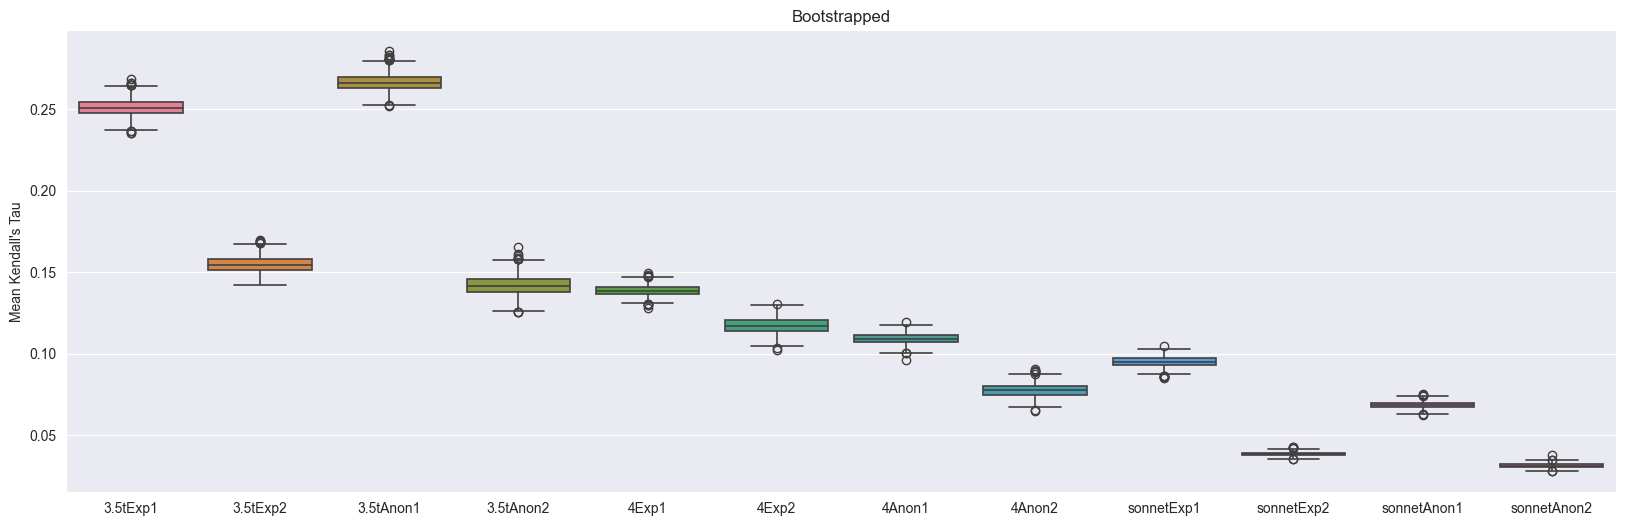

In [124]:
plt.figure(figsize=(20, 6))
sns.boxplot(all, linewidth=1.2)
plt.ylabel('Mean Kendall\'s Tau')
plt.title('Bootstrapped')

In [127]:
data1 = np.load('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/run1_allpairs/gpt3.5turbo-free-True-20-1.0/means.npz')
data2 = np.load('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/run1_allpairs/gpt3.5turbo-free-False-20-1.0/means.npz')
data3 = np.load('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/run1_allpairs/gpt4-free-True-20-1.0/means.npz')
data4 = np.load('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/run1_allpairs/gpt4-free-False-20-1.0/means.npz')
data5 = np.load('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/run1_allpairs/claude35sonnet-free-True-20-1.0/means.npz')
data6 = np.load('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/run1_allpairs/claude35sonnet-free-False-20-1.0/means.npz')

In [132]:
data1_1, data1_2 = data1['move1'], data1['move_2']
data2_1, data2_2 = data2['move1'], data2['move2']
data3_1, data3_2 = data3['move1'], data3['move_2']
data4_1, data4_2 = data4['move1'], data4['move_2']
data5_1, data5_2 = data5['move1'], data5['move_2']
data6_1, data6_2 = data6['move1'], data6['move_2']

In [133]:
all = pd.DataFrame([data1_1, data1_2, data2_1, data2_2, data3_1, data3_2, data4_1, data4_2, data5_1, data5_2, data6_1, data6_2]).T

In [134]:
all.columns = [
    '3.5tExp1', '3.5tExp2',
    '3.5tAnon1', '3.5tAnon2',
    '4Exp1', '4Exp2',
    '4Anon1', '4Anon2',
    'sonnetExp1', 'sonnetExp2',
    'sonnetAnon1', 'sonnetAnon2',
]

In [ ]:
plt.figure(figsize=(20, 6))
sns.boxplot(all, linewidth=1.2)
plt.ylabel('Mean Kendall\'s Tau')
plt.title('Bootstrapped')